In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import numpy as np




# Load the dataset


In [24]:
data = pd.read_csv('topuniversities.csv')

In [25]:

primary_color = "#1f77b4"
secondary_color = "#ff7f0e"

def preprocess_data(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    return data

data = preprocess_data(data)



# --- Regional Analysis ---

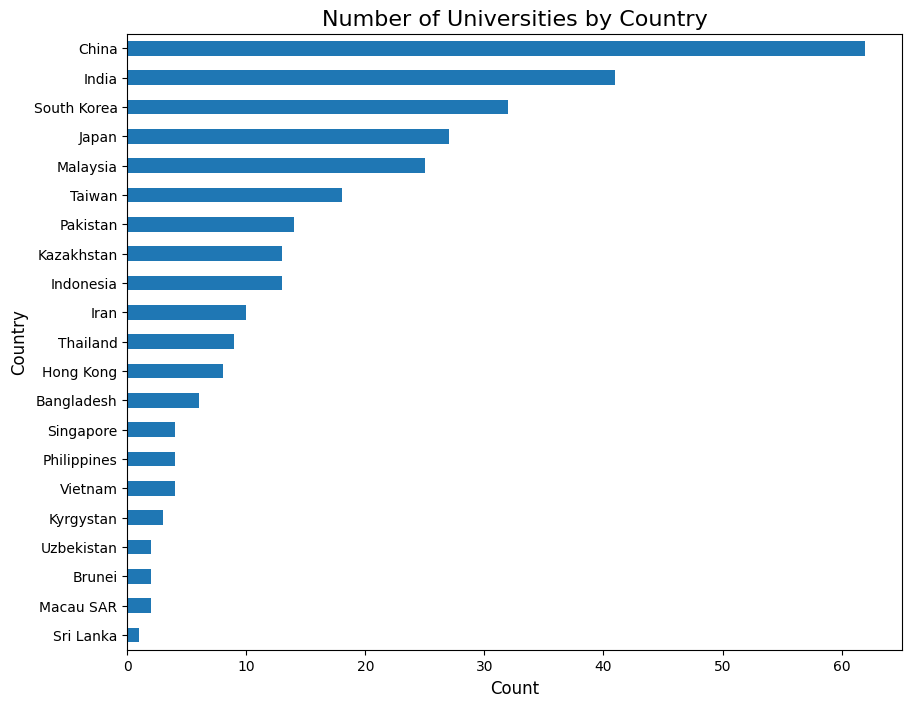

In [26]:
plt.figure(figsize=(10, 8))
country_counts = data['Country'].value_counts().sort_values()
country_counts.plot(kind='barh', color=primary_color)
plt.title('Number of Universities by Country', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()



# --- Rank Prediction (Regression Model) ---


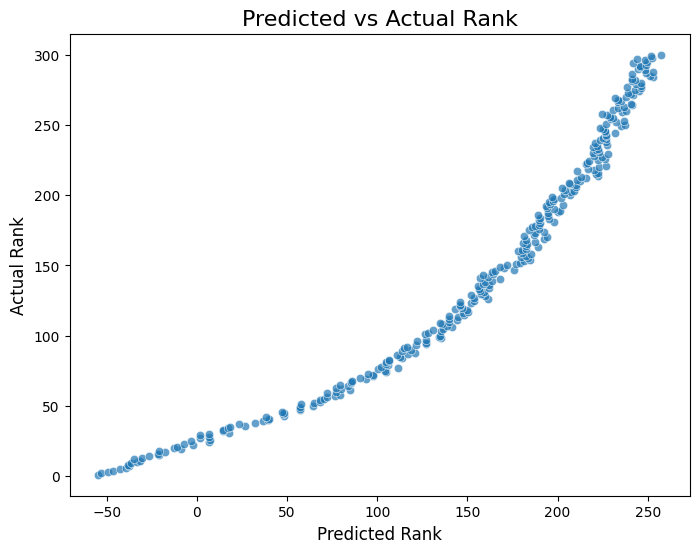

In [27]:
features = ['Overall Score', 'Citations per Paper', 'Academic Reputation']
target = 'Rank'
data = data.dropna(subset=features + [target])

X = data[features]
y = data[target]

model = LinearRegression().fit(X, y)
data['Predicted Rank'] = model.predict(X)

# Scatter plot of predicted vs actual rank
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Predicted Rank'], y=data['Rank'], color=primary_color, alpha=0.7)
plt.title('Predicted vs Actual Rank', fontsize=16)
plt.xlabel('Predicted Rank', fontsize=12)
plt.ylabel('Actual Rank', fontsize=12)
plt.show()


# --- Correlation Heatmap ---

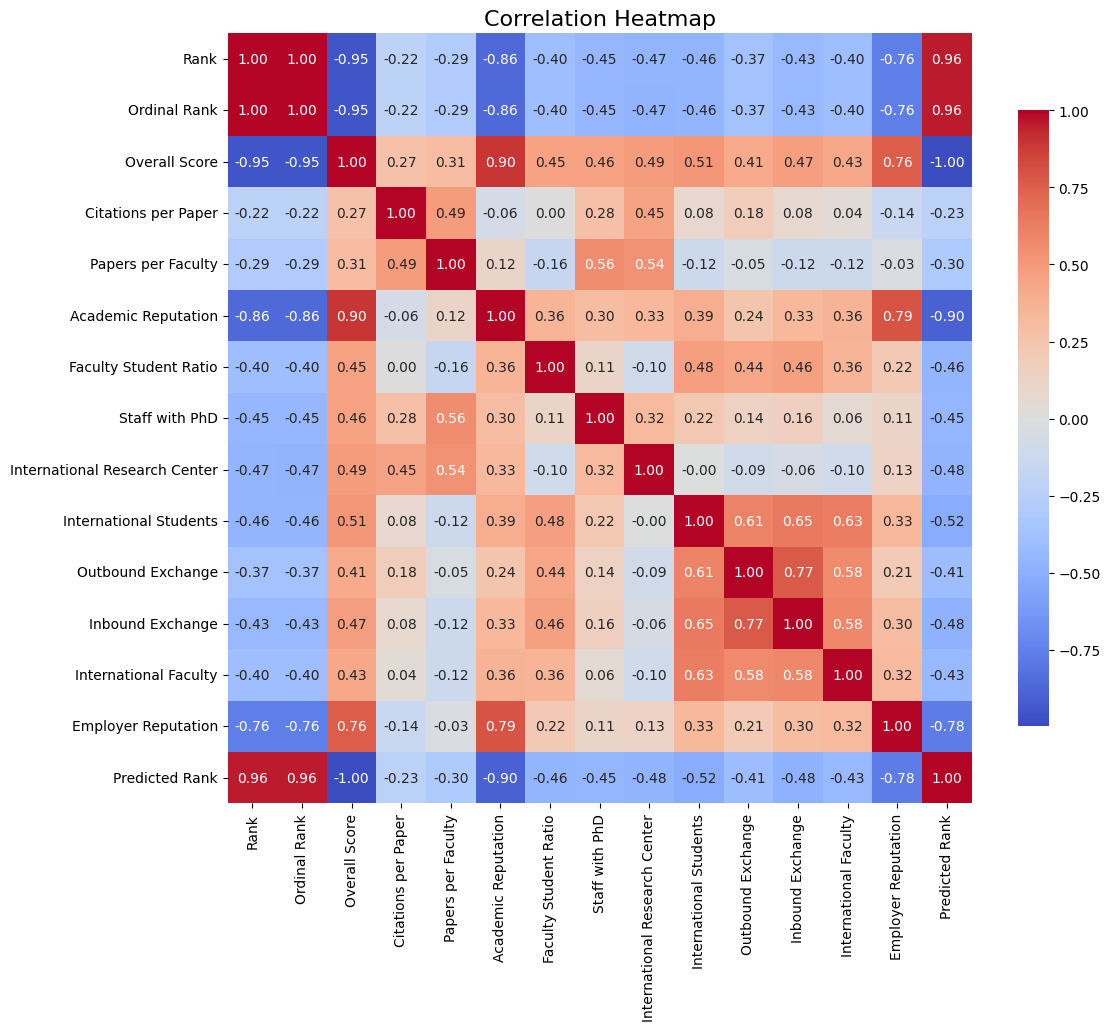

In [28]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



# --- Research Impact Analysis ---


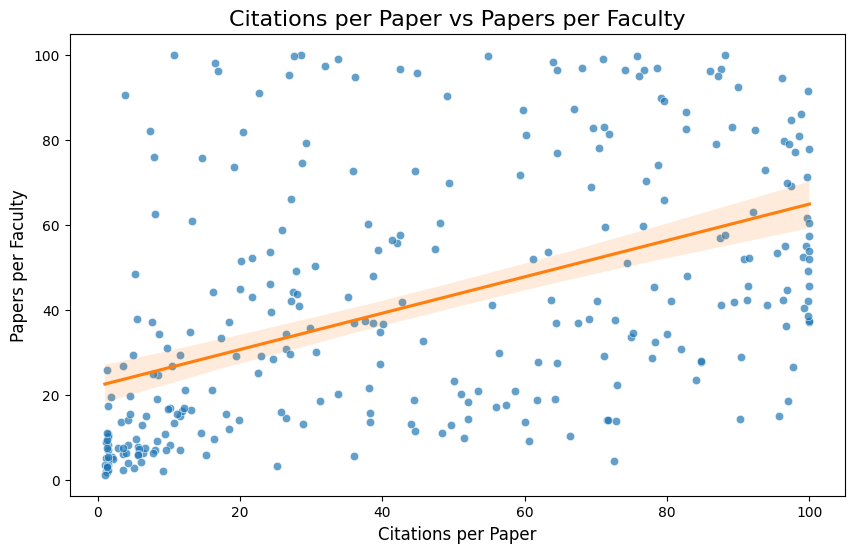

In [29]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Citations per Paper', y='Papers per Faculty', color=primary_color, alpha=0.7)
sns.regplot(data=data, x='Citations per Paper', y='Papers per Faculty', scatter=False, color=secondary_color)
plt.title('Citations per Paper vs Papers per Faculty', fontsize=16)
plt.xlabel('Citations per Paper', fontsize=12)
plt.ylabel('Papers per Faculty', fontsize=12)
plt.show()


# --- Clustering Universities ---


In [30]:

cluster_features = ['Citations per Paper', 'Papers per Faculty', 'Academic Reputation']
X_cluster = data[cluster_features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
data['Cluster'] = kmeans.labels_

fig = px.scatter_3d(data, x='Citations per Paper', y='Papers per Faculty', z='Academic Reputation',
                    color='Cluster', title='University Clusters', color_continuous_scale='Viridis')
fig.show()


# --- Faculty Contributions ---


C:\Users\Fawad\AppData\Local\Temp\ipykernel_14112\4250248006.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Fawad\AppData\Local\Temp\ipykernel_14112\4250248006.py:2: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.



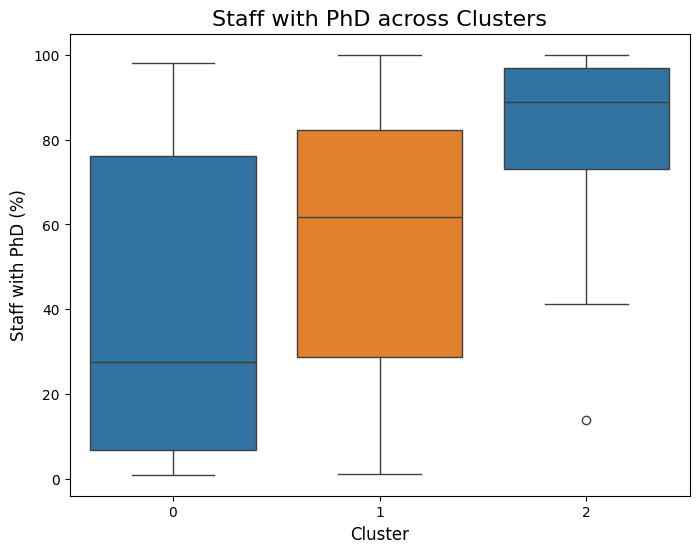

In [31]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Cluster', y='Staff with PhD', palette=[primary_color, secondary_color])
plt.title('Staff with PhD across Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Staff with PhD (%)', fontsize=12)
plt.show()



# --- International Diversity ---


(array([0, 1]),
 [Text(0, 0, 'International Students'), Text(1, 0, 'International Faculty')])

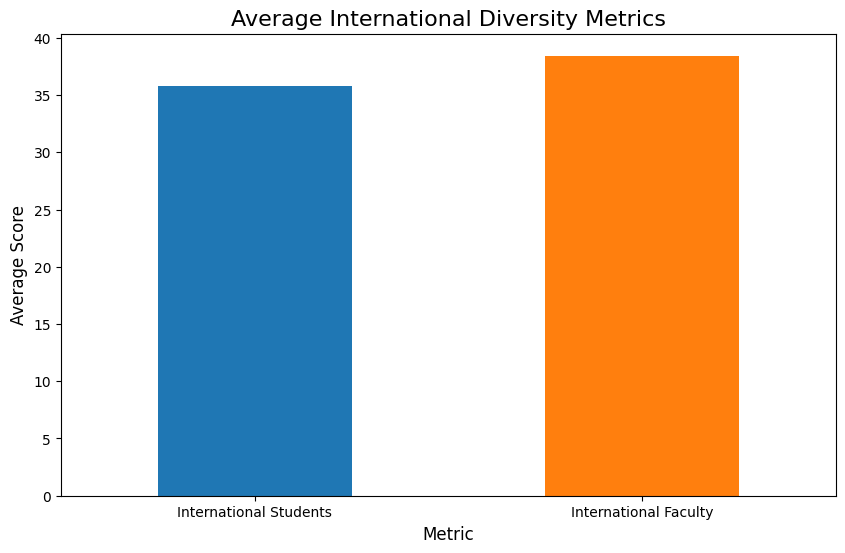

In [32]:
plt.figure(figsize=(10, 6))
data[['International Students', 'International Faculty']].mean().plot(kind='bar', color=[primary_color, secondary_color])
plt.title('Average International Diversity Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=0)



# --- Outbound and Inbound Exchanges ---


c:\Users\Fawad\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\Fawad\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\Fawad\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\Fawad\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



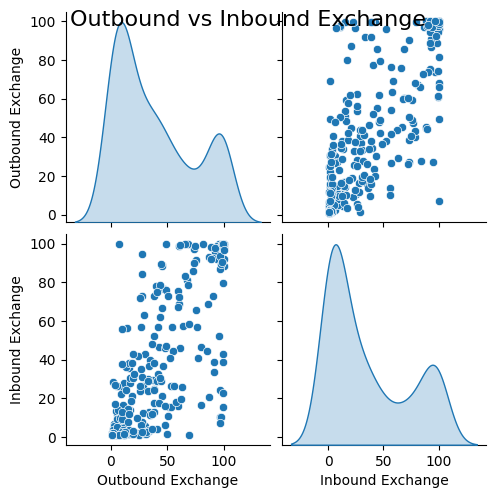

In [33]:

sns.pairplot(data[['Outbound Exchange', 'Inbound Exchange']], kind='scatter', palette='coolwarm', diag_kind='kde')
plt.suptitle('Outbound vs Inbound Exchange', fontsize=16)
plt.show()